TP 2 : Extraction d'information
-Sylviane Van Rymenant-

Mots-clés

In [1]:
import os
import yake

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

# Les 100 fichiers d'une année
files[4936:5036]

for f in sorted(files)[4936:5036]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1941-01-02_01-00005.txt mentions these keywords: Achet réduit, PRESSE QUOTIDIENNE, Ville Anvers, Vendeur réduit, réduit Soie, demeurant rue, Poirier Achet, titre Intérêts, Vesdre Achet, réduit Dette, Alfred DUBOIS, réduit Trust...
KB_JB838_1941-01-08_01-00003.txt mentions these keywords: Popolo d'Italia, S'malie italienne, l’amiral Darlan, avions ennemis, nouveau Conseil, navires anglais, char d’assaut...
KB_JB838_1941-01-11_01-00003.txt mentions these keywords: lord Halifax, France Berlin, président Roosevelt, avion ennemi, Reich allemand, matériel d’armement, maréchal Pétain, avions ennemis...
KB_JB838_1941-01-17_01-00006.txt mentions these keywords: AGENCE ROSSEL, Faire offre, Ecrire Agence, ROSSEL Bruxelle, LOUER app, cherche place, Prix mod, Ecrire prix, tMhe Farta...
KB_JB838_1941-01-18_01-00008.txt mentions these keywords: vente publique, Notaire René, siège social, ANVERS Vente, BRUXELLES Vente, Notaire COLS, BELLE PROPRIETE, notaire DANDOY, LONGUE RUE...
KB_JB838_1941

Stopwords et nuage de mots

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


[('bruxelles', 1534), ('anvers', 542), ('vendre', 536), ('Ã©tat', 536), ('avenue', 462), ('guerre', 456), ('rÃ©duit', 452), ('cap', 429), ('commerce', 408), ('louer', 408), ('belgique', 403), ('mal', 388), ('cherche', 368), ('grande', 359), ('avril', 359), ('art', 351), ('lieu', 351), ('travail', 350), ('acheteur', 341), ('rapport', 340), ('eau', 334), ('ordre', 331), ('temps', 330), ('belle', 326), ('nord', 321), ('salle', 320), ('partie', 319), ('notaire', 314), ('neuf', 312), ('gÃ©nÃ©ral', 306), ('premier', 304), ('midi', 304), ('offre', 291), ('jardin', 284), ('jean', 278), ('janvier', 274), ('france', 273), ('nouveau', 271), ('cour', 270), ('point', 269), ('app', 265), ('sociÃ©tÃ©', 263), ('gaz', 259), ('libre', 259), ('heure', 258), ('porte', 257), ('cent', 256), ('centre', 254), ('premiÃ¨re', 250), ('allemagne', 249), ('cas', 246), ('nouvelle', 246), ('jeune', 246), ('pet', 246), ('etat', 245), ('fin', 243), ('conf', 242), ('franÃ§ais', 241), ('terrain', 241), ('septembre', 240)

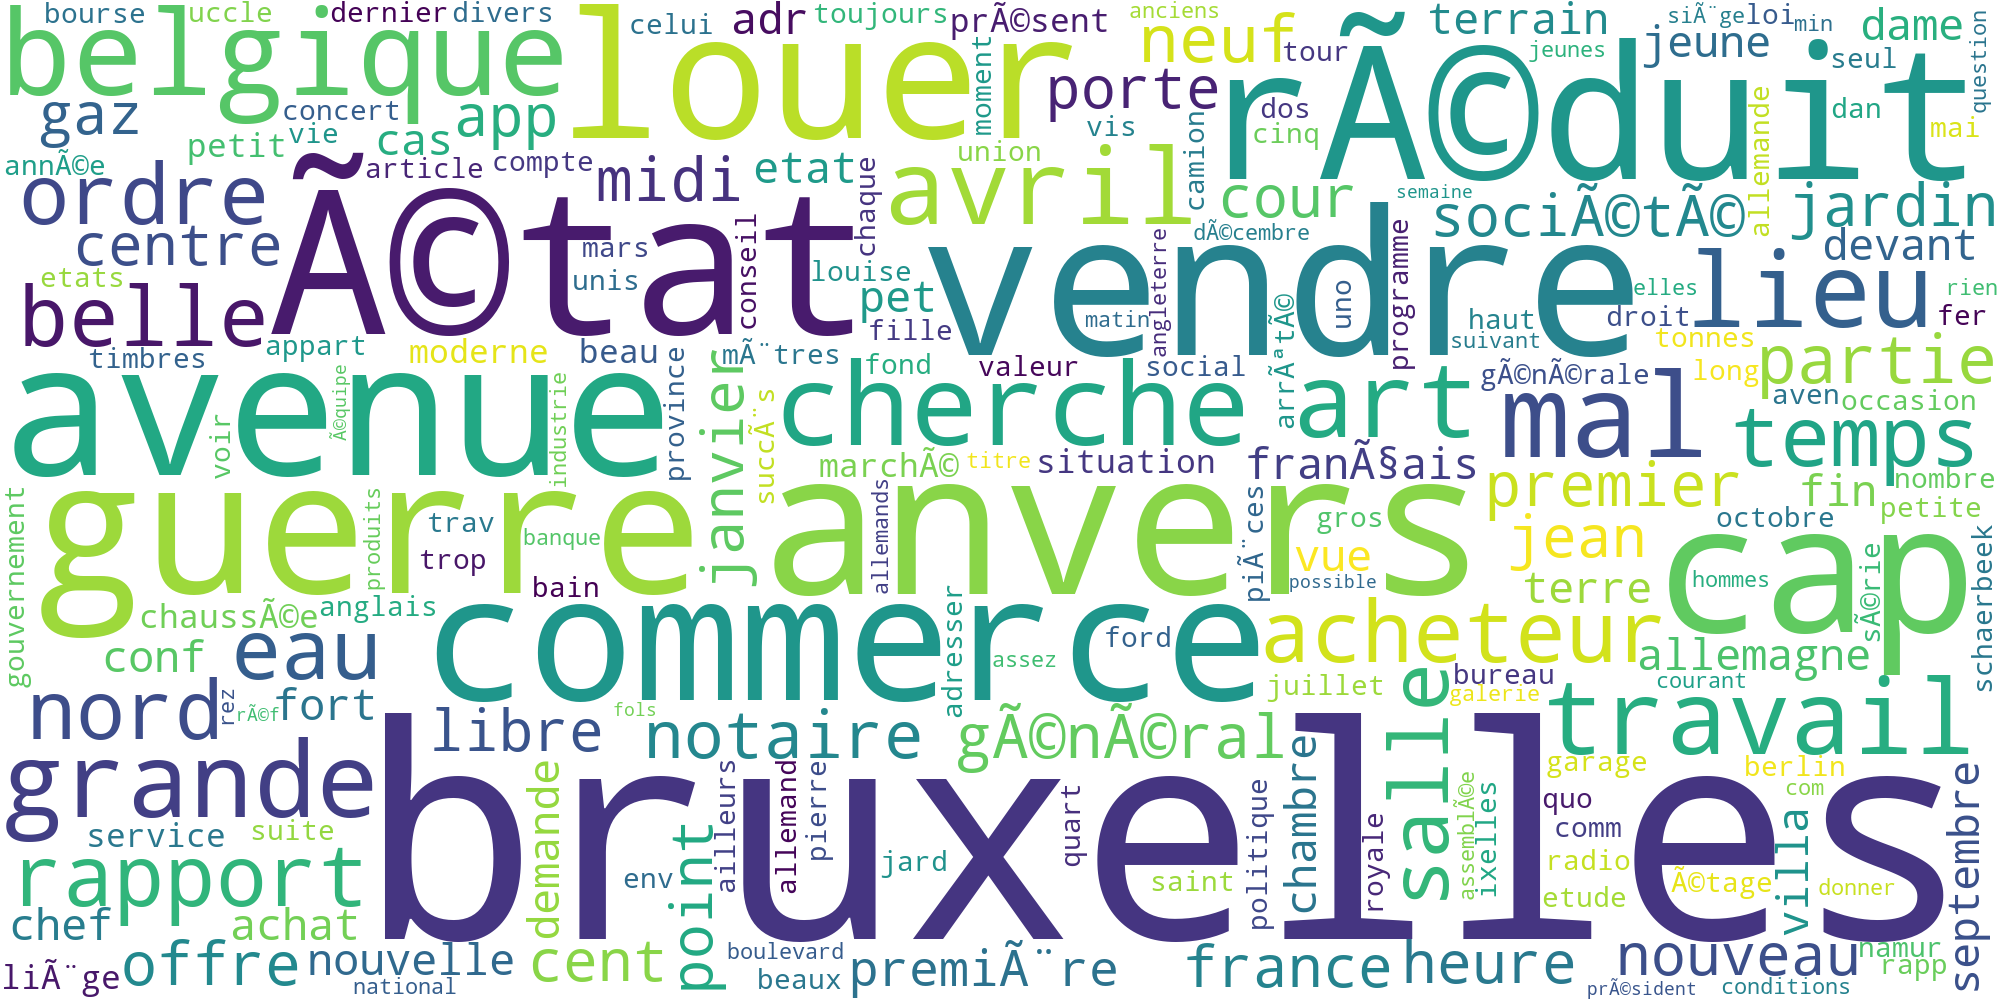

In [8]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rue","prix","ecr","ecrire","dem","rossel","bon","place","franc","maison","grand","heures"
       ,"francs","mois","mod","leurs","leur","jour","part","ans","jour","jours","brux","bonne","bon","belge","toute","tout"
       ,"agence","tél","très","etc","quelques", "avant","peu","également","chez","lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche",
       "cours","vend","achet","pays","soir","plusieurs","ceux","car","vers","vente","dès","près","mme","déjà","prés",
       "dés","bel","ruo","ach"]
sw = set(sw)

# Choisir une année
year = 1941

# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r',encoding="utf-8") as f:
        content_list.append(f.read())

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w',encoding="utf-8") as f:
    f.write(' '.join(content_list))

# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r',encoding="utf-8") as f:
    before = f.read()

before[:500]

def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

frequencies = Counter(after.split())
print(frequencies.most_common(100))

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

Entités nommées principales

In [3]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

nlp = spacy.load('fr_core_news_md')

# Charger le texte
n=900000
text = open("../data/tmp/1941_clean.txt", encoding='utf-8').read()[:n]


# Traiter le texte

doc = nlp(text)






Noms de personnes

In [4]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 1:
        people[ent.text] += 1
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:10]:
    print(f"{person} apparait {freq} fois dans le corpus")

roosevelt apparait 32 fois dans le corpus
donald apparait 20 fois dans le corpus
churchill apparait 10 fois dans le corpus
matsuoka apparait 9 fois dans le corpus
maréchal pétain apparait 7 fois dans le corpus
greenwood apparait 6 fois dans le corpus
michel ange apparait 6 fois dans le corpus
lambert apparait 6 fois dans le corpus
matchek apparait 6 fois dans le corpus
washington apparait 5 fois dans le corpus


Noms d'organisations

In [5]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 1:
        people[ent.text] += 1

# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:10]:
    print(f"{person} apparait {freq} fois dans le corpus")

yougoslavie apparait 20 fois dans le corpus
ford apparait 15 fois dans le corpus
reich apparait 6 fois dans le corpus
racing apparait 6 fois dans le corpus
renault apparait 5 fois dans le corpus
zeitung apparait 3 fois dans le corpus
philips apparait 3 fois dans le corpus
banque anvers apparait 3 fois dans le corpus
peugeot apparait 3 fois dans le corpus
iso apparait 3 fois dans le corpus


Noms de lieux

In [7]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 1:
        people[ent.text] += 1

# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:20]:
    print(f"{person} apparait {freq} fois dans le corpus")

bruxelles apparait 142 fois dans le corpus
allemagne apparait 84 fois dans le corpus
angleterre apparait 73 fois dans le corpus
berlin apparait 68 fois dans le corpus
france apparait 48 fois dans le corpus
schaerbeek apparait 45 fois dans le corpus
japon apparait 41 fois dans le corpus
belgique apparait 34 fois dans le corpus
londres apparait 31 fois dans le corpus
liège apparait 27 fois dans le corpus
europe apparait 27 fois dans le corpus
paris apparait 23 fois dans le corpus
rome apparait 21 fois dans le corpus
namur apparait 21 fois dans le corpus
italie apparait 19 fois dans le corpus
moscou apparait 18 fois dans le corpus
anderlecht apparait 15 fois dans le corpus
gand apparait 15 fois dans le corpus
amérique apparait 14 fois dans le corpus
russie apparait 14 fois dans le corpus


Analyse des sentiments (10 phrases)


In [12]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")




Phrase 1

In [13]:
get_sentiment("Cet argent viendra à point pour des familles belges, frappées par les maux d’une guerre dans laquelle la Belgique a été attirée par la faute de l'Angleterre.")

This text is neutral and perfectly objective.


Phrase 2

In [14]:
get_sentiment("Nous devrons le considérer comme un étranger d’une race opposée à la nôtre et ne point mélanger notre sang avec le sien.")

This text is 15% negative and 0.25% subjective.


Phrase 3

In [15]:
get_sentiment("Au lieu de se demander: * Que doit penser la France, que doit faire la France ? », ils se disent : * Que pense l’Amérique, que va faire l’Amêriaue ? ■> ")

This text is neutral and perfectly objective.


Phrase 4

In [16]:
get_sentiment("Quand donc, au lieu de penser et d’agir en fonction de l’étranger, la France pensera-t-elle et aglra-l-elle en fonction d’elle-mème ?")

This text is 20% negative and 0.3% subjective.


Phrase 5

In [17]:
get_sentiment("La propagande mensongère brit annique s’efforce à présent de faire croire au public qu’il s’agit ici d’une provocation systématique de la part du Reich")

This text is 4% negative and perfectly objective.


Phrase 6

In [18]:
get_sentiment("Cette prétention est particulièrement lamentable, si Ton se rappelle que l’aviation britannique a, depuis longtemps déjà, systématiquement violé l’espace aérien étranger, notamment à Marseille, Genève, Zurich, Bâle, etc. ")

This text is 13% negative and 0.38% subjective.


Phrase 7

In [19]:
get_sentiment("On n’ose pas regarder en face, on ne veut pas comprendre la Révolution nationale-socialiste, qui a sauvé l’Allemagne et qui fera l’Europe. ")

This text is neutral and perfectly objective.


Phrase 8

In [20]:
get_sentiment("Au stade « empirique. » d’un antisémitisme instinctif, spontané et brutal, il nous faut définitivement substituer un antisémitisme réfléchi, systématique et pacifique.")

This text is 4% positive and 0.6900000000000001% subjective.


Phrase 9

In [24]:
get_sentiment("A ce brillant succès ont pris part, dans une large mesure, les territoires qui ont été incorporés ccs dernières années dans le grand Reich allemand.")

This text is 16% positive and 0.25999999999999995% subjective.


Phrase 10

In [25]:
get_sentiment("La propagande ennemie essaie de minimiser l’effet de ces succès allemands, qu’il lui est Impossible de nier encore, en Inventant que les pertes allemandes en tués seulement s'élèvent de 1,500,000 a 2,000,000 d’hommes.")

This text is 28% negative and 0.25% subjective.
